In [1]:
import uproot
from matplotlib import pyplot as plt


/var/folders/q7/89d3jdld7lbf_4t70rx5q0xc0000gn/T/ipykernel_64339/1567786328.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


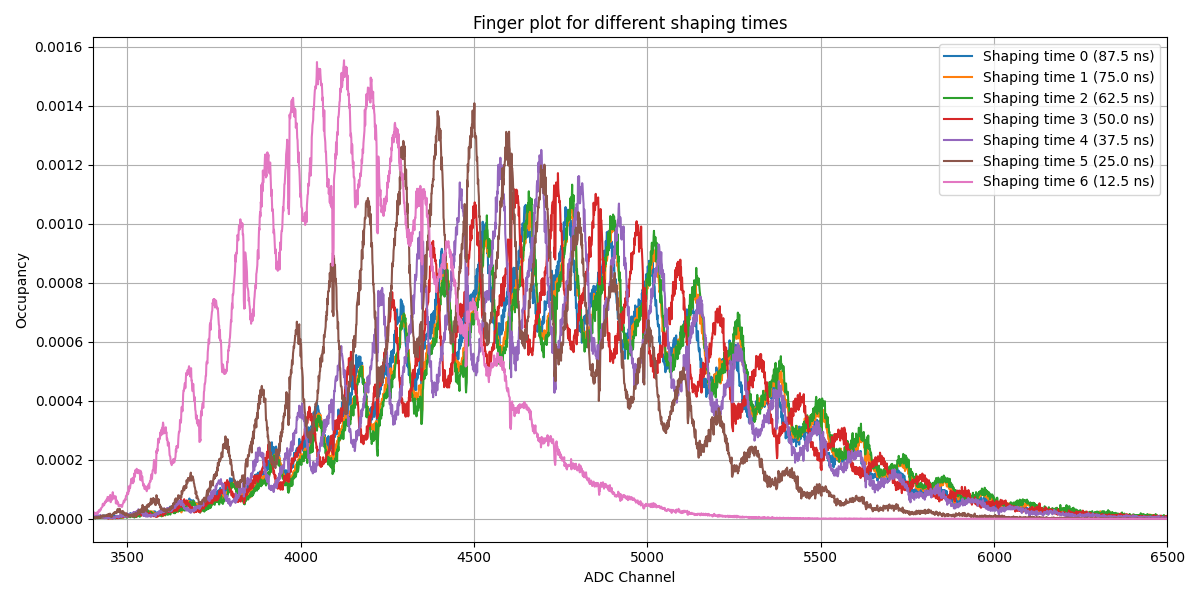

In [23]:
%matplotlib widget
file0 = "/Users/dipti/Work/DataDir/SiPM_Characterization/Shaping_time_calibration/PST_Ch06_44V_SH0/data.root"
file1 = "/Users/dipti/Work/DataDir/SiPM_Characterization/Shaping_time_calibration/PST_Ch06_44V_SH1/data.root"
file2 = "/Users/dipti/Work/DataDir/SiPM_Characterization/Shaping_time_calibration/PST_Ch06_44V_SH2/data.root"
file3 = "/Users/dipti/Work/DataDir/SiPM_Characterization/Shaping_time_calibration/PST_Ch06_44V_SH3/data.root"
file4 = "/Users/dipti/Work/DataDir/SiPM_Characterization/Shaping_time_calibration/PST_Ch06_44V_SH4/data.root"
file5 = "/Users/dipti/Work/DataDir/SiPM_Characterization/Shaping_time_calibration/PST_Ch06_44V_SH5/data.root"
file6 = "/Users/dipti/Work/DataDir/SiPM_Characterization/Shaping_time_calibration/PST_Ch06_44V_SH6/data.root"

channel = "PST_Layer1_C_HG"
with uproot.open(file0) as f0, uproot.open(file1) as f1, uproot.open(file2) as f2, uproot.open(file3) as f3, uproot.open(file4) as f4, uproot.open(file5) as f5, uproot.open(file6) as f6:
    tree0 = f0["output_tree"]
    tree1 = f1["output_tree"]
    tree2 = f2["output_tree"]
    tree3 = f3["output_tree"]
    tree4 = f4["output_tree"]
    tree5 = f5["output_tree"]
    tree6 = f6["output_tree"]
    

    # Read the data from each tree
    data0 = tree0.arrays([channel], library="pd")
    data1 = tree1.arrays([channel], library="pd")
    data2 = tree2.arrays([channel], library="pd")
    data3 = tree3.arrays([channel], library="pd")
    data4 = tree4.arrays([channel], library="pd")
    data5 = tree5.arrays([channel], library="pd")
    data6 = tree6.arrays([channel], library="pd")


    data_list = [data0, data1, data2, data3, data4, data5, data6]
    label_list = ["Shaping time 0 (87.5 ns)", "Shaping time 1 (75.0 ns)", "Shaping time 2 (62.5 ns)", "Shaping time 3 (50.0 ns)", "Shaping time 4 (37.5 ns)", "Shaping time 5 (25.0 ns)", "Shaping time 6 (12.5 ns)"]
    
    plt.figure(figsize=(12, 6))

    for data, label in zip(data_list, label_list):
        if channel in data.columns:

            # Normalize the data
            y = data[channel].values
            area = y.sum()
            y_norm = y / area if area > 0 else y

            plt.plot(data.index, y_norm, label=label)
        else:
            print(f"Channel {channel} not found in data for {label}")
    plt.xlabel("ADC Channel")
    plt.ylabel("Occupancy")
    plt.title("Finger plot for different shaping times")
    plt.legend()
    plt.grid()
    plt.xlim(3400, 6500)
    plt.tight_layout()
    plt.show()
    plt.savefig("shaping_time_comparison.png", dpi=300, bbox_inches='tight')

In [20]:
! open shaping_time_comparison.png